<a href="https://colab.research.google.com/github/EmmarieR/CNM-DeepDive-Data-Science-Projects/blob/main/ER_Project_6_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Images – To Do List



Prior to starting this problem, be sure to enable the GPU runtime processing in your Jupyter notebook.



## Problem Definition


For this project, we will be training a deep-learning model to classify images. We are given a feature dataset of images that contain either a cat or a dog. The model should be trained to determine whether an image contains a cat or a dog.

There are three files in this data set:
- [the feature set]( https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle ), i.e. images of dogs and cats ( mostly )
- [the target set]( https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle ), i.e. the label (0/1) that something is a dog or cat ( mostly )
- [a test image]( https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg )

The feature data set consists of 2 target image subjects: 0 for dog, 1 for cat. There are 24946 images that are each 100x100 pixels and in greyscale. The pictures and corresponding target codes are stored in pickle files on Amazon.

### imports

In [167]:
!pip install pillow
import PIL

In [168]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import os
from PIL import Image

import tensorflow.keras as keras
import tensorflow as tf

from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

from google.colab import drive
from io import BytesIO

## Data Collection



* Load pickled data from X.pickle and y.pickle from the AWS S3 bucket.



In [169]:
# read_pickle to call data set into arrays
features = pd.read_pickle('https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle')
targets = pd.read_pickle('https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle')

# ensure the pickle reads are arrays
features = np.array(features)
targets = np.array(targets)

In [170]:
# length of features and targets arrays
print(len(features))
print(len(targets))

24946
24946


Looks like there are 24946 pictures

0


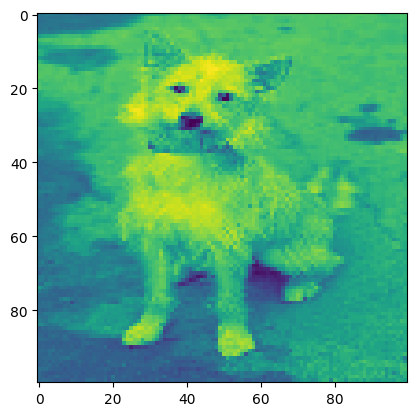

In [171]:
# show the first image and target value from the arrays
print(targets[0])
plt.imshow(features[0])

## Data Cleaning



* Scale the values in X so that they fall between 0 and 1 by dividing by 255.



In [172]:
# scale numbers in features array
features = features/255

[[[0.37254902]
  [0.36862745]
  [0.38431373]
  ...
  [0.66666667]
  [0.6745098 ]
  [0.67058824]]

 [[0.36078431]
  [0.35686275]
  [0.37254902]
  ...
  [0.66666667]
  [0.6745098 ]
  [0.67058824]]

 [[0.34901961]
  [0.35686275]
  [0.36078431]
  ...
  [0.64705882]
  [0.6627451 ]
  [0.6627451 ]]

 ...

 [[0.32941176]
  [0.29803922]
  [0.28627451]
  ...
  [0.52941176]
  [0.64313725]
  [0.60392157]]

 [[0.32156863]
  [0.30980392]
  [0.27843137]
  ...
  [0.55686275]
  [0.5254902 ]
  [0.6       ]]

 [[0.31372549]
  [0.33333333]
  [0.33333333]
  ...
  [0.59215686]
  [0.57254902]
  [0.54117647]]]


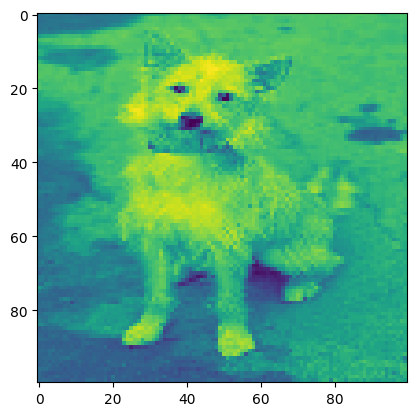

In [173]:
print(features[0])
plt.imshow(features[0])

## Exploratory Data Analysis



* Look at the shape of X and y. Ensure that X is 4 dimensional.

* Plot a few ( >5 ) of the images in X using `plt.imshow()`.

* Look at the response values in y for those images.

* Hint: you may want to start with a random subset to get familiar with the process of building a NN.  Then go through the process again with the full set.



In [174]:
# shape of features and targets
print(features.shape)
print(targets.shape)

(24946, 100, 100, 1)
(24946,)


There are 24946 images, each image is 100 x 100 pixels and 1 color channel

In [175]:
# pic 5 random images
pics = np.random.randint(0, 24946, 5)
pics

array([17428,  5015, 11850, 18738, 18168])

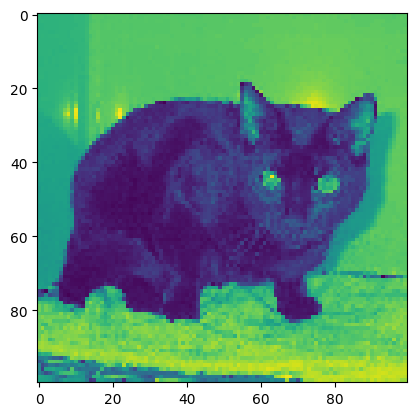

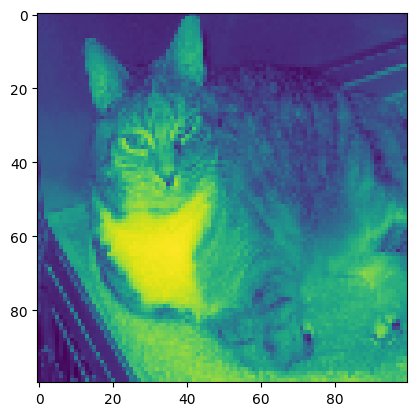

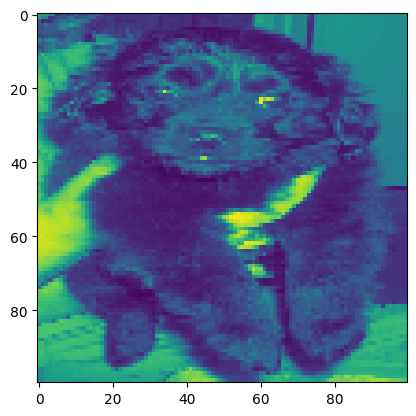

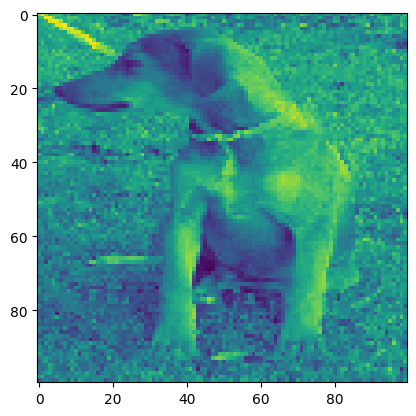

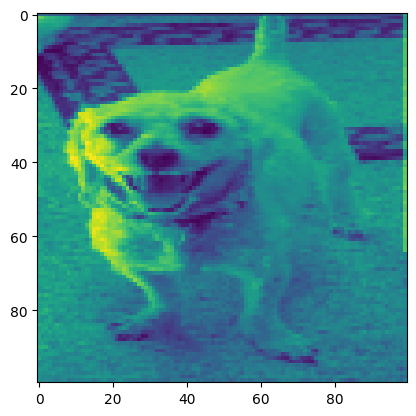

In [176]:
#  pictures print
for i in pics:
  plt.imshow(features[i])
  plt.show()

In [177]:
# print target values
for i in pics:
  print(targets[i])

1
1
0
0
0


Looks like 0 indicates a dog subject. 1 indicates a cat subject. Some of the images include other subjects or obscurities, may make the training a bit harder for the model.

## Data Processing



* Split X and y into training and testing sets.

*  Build a convolutional neural network with the following:
  * Sequential layers
  * At least two 2D convolutional layers using the 'relu' activation function and a (3,3) kernel size.
  * A MaxPooling2D layer after each 2D convolutional layer that has a pool size of (2,2).
  * A dense output layer using the 'sigmoid' activation function.
  Note: you can play around with the number of layers and nodes to try to get better performance.

* Compile your model. Use the 'adam' optimizer. Determine which loss function and metric is most appropriate for this problem.

* Fit your model using the training set.

* Evaluate your model using the testing set.

* Plot the distribution of probabilities for the testing set.

* Define a function that will read in a new image and convert it to a 4 dimensional array of pixels (ask the instructor for help with this). Hint: [numpy.reshape]( https://numpy.org/doc/stable/reference/generated/numpy.reshape.html )

* Use the function defined above to read in the dog.jpg image that is saved in the AWS S3 bucket.

* Use the neural network you created to predict whether the image is a dog or a cat.



In [178]:
# split features and targets into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=0)

### sequential layers

In [179]:
# call model
model = Sequential()
# define first 2D convolutional layer
model.add(
  Conv2D(
    name = "input1",
    input_shape = (100,100,1),
    filters = 25,
    kernel_size = (3,3),
    activation = 'relu',
  ))
# define first MaxPooling layer
model.add(
  MaxPooling2D(
    name = "input2",
    pool_size = (2,2)
  ))
# define second 2d convolutional layer
model.add(
  Conv2D(
    name = "input3",
    filters = 75,
    kernel_size = (3,3),
    activation = 'relu',
 ))
# define second MaxPooling layer
model.add(
  MaxPooling2D(
    name = "input4",
    pool_size = (2,2)
  ))
# flatten for output
model.add(
    Flatten())
# define output
model.add(
  Dense(
    name = "output",
    units = 1,
    activation = 'sigmoid'
  ))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [180]:
# compile model
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'],
)

In [181]:
model.fit(X_train, y_train, epochs=10) ;

Epoch 1/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5895 - loss: 0.6594
Epoch 2/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7552 - loss: 0.5087
Epoch 3/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7837 - loss: 0.4514
Epoch 4/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8106 - loss: 0.4114
Epoch 5/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8399 - loss: 0.3650
Epoch 6/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8651 - loss: 0.3229
Epoch 7/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8816 - loss: 0.2850
Epoch 8/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9004 - loss: 0.2471
Epoch 9/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9136 - loss: 0.2170
Epoch 10/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9329 - loss: 0.1830


In [182]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input1 (Conv2D)                 │ (None, 98, 98, 25)     │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ input2 (MaxPooling2D)           │ (None, 49, 49, 25)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ input3 (Conv2D)                 │ (None, 47, 47, 75)     │        16,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ input4 (MaxPooling2D)           │ (None, 23, 23, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 39675)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │        39,676 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 170,630 (666.53 KB)

 Trainable params: 56,876 (222.17 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 113,754 (444.36 KB)

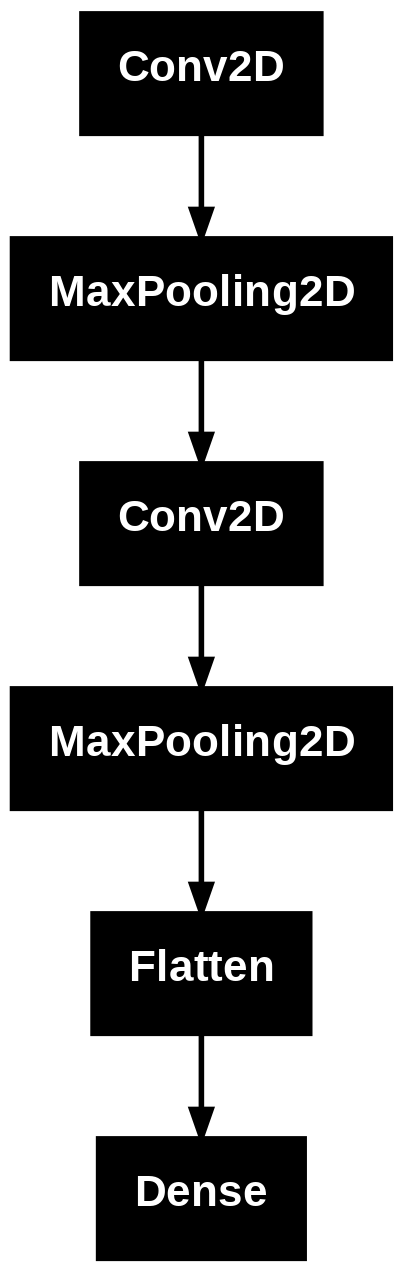

In [183]:
plot_model(model)

In [184]:
val_loss, val_acc = model.evaluate(X_test, y_test)
val_acc

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8035 - loss: 0.5095


0.7957915663719177

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


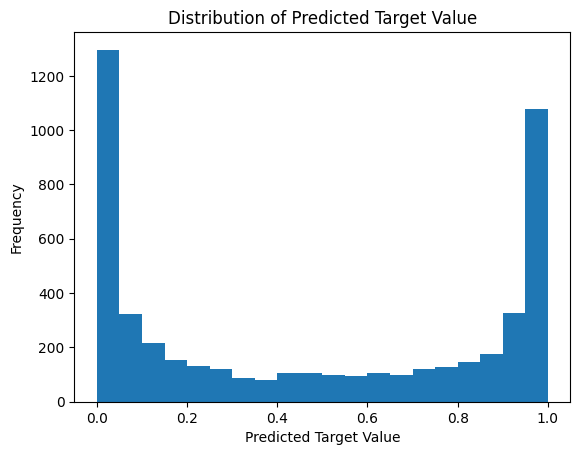

In [185]:
# plot distribution of guesses
probs = model.predict(X_test)
plt.hist(probs, bins = 20)
plt.title("Distribution of Predicted Target Value")
plt.xlabel("Predicted Target Value")
plt.ylabel("Frequency")
plt.show()

Sigmoid activation ensures values picked are between 1 and 0, good for binary like in our case here. the vast majority of the predictions are 1 or 0.

Let's call in the tester image and feed it to the model for target prediction.

In [186]:
# define function to read in test image

def read_pic(path):
  """given the file path or URL to an image, import it to Google Collab as numpy array,
  and convert it to default colormap, 100x100 pixels. ensure shape is ((100,100,1)).
  display image"""

  # check if the path is a URL
  if path.startswith('http://') or path.startswith('https://'):
    # download the image from the URL
    response = requests.get(path)
    if response.status_code == 200:
      # save the image to a temporary local file
      local_filename = path.split('/')[-1]
      with open(local_filename, 'wb') as f:
        f.write(response.content)
        # make local file
        path = local_filename
    else:
      print(f"Failed to download image from {path}. Status code: {response.status_code}")
      return None

  img = keras.preprocessing.image.load_img(path, target_size=(100,100)) # 100x100 pixels
  img_array = keras.preprocessing.image.img_to_array(img) # call to array
  img_array = tf.image.rgb_to_grayscale(img_array) # color --> grayscale
  img_display = np.squeeze(img_array) # remove 1d entries in array for plt.imshow()
  plt.imshow(img_display) # display image
  img_array = tf.expand_dims(img_array, 0) # add batch dimension back for model input
  return img_array

<tf.Tensor: shape=(1, 100, 100, 1), dtype=float32, numpy=
array([[[[102.6443 ],
         [102.6443 ],
         [ 99.64461],
         ...,
         [151.9586 ],
         [153.9584 ],
         [154.94751]],

        [[ 96.933  ],
         [100.9326 ],
         [102.9324 ],
         ...,
         [153.3175 ],
         [151.7198 ],
         [157.9472 ]],

        [[100.9326 ],
         [100.9326 ],
         [101.9325 ],
         ...,
         [160.078  ],
         [153.7196 ],
         [159.947  ]],

        ...,

        [[143.0531 ],
         [139.7653 ],
         [131.7661 ],
         ...,
         [230.3135 ],
         [228.21051],
         [226.9225 ]],

        [[124.7668 ],
         [125.7667 ],
         [122.36491],
         ...,
         [231.48752],
         [225.6129 ],
         [228.32451]],

        [[112.2088 ],
         [107.3664 ],
         [107.0783 ],
         ...,
         [233.47652],
         [228.77591],
         [229.61252]]]], dtype=float32)>

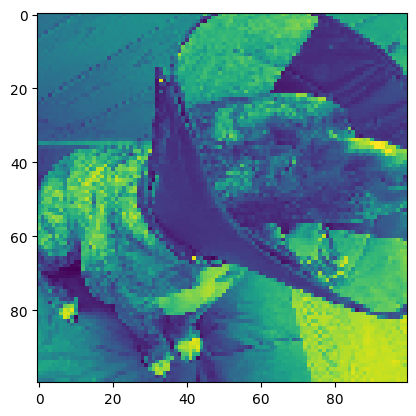

In [187]:
# call in test image
test_image = read_pic('https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg')
test_image

In [188]:
# feed image to model and get predicted value
prediction = model.predict(test_image)
print(f' {prediction} is the predicted target value. (0 = dog, 1 = cat)')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
 [[0.]] is the predicted target value. (0 = dog, 1 = cat)


yay, looks like it worked.

## Communication of Results


confusion matrix of model predictions. All non 0, and non 1 predictions are filtered as 0 if < 0.5, otherwise 1 if > 0.5.


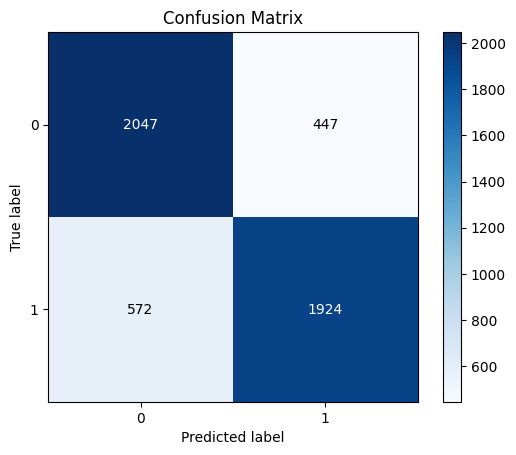

In [189]:
# confusion matrix
predictions = (probs > 0.5).astype(int) # call all predictions to 0 and 1 binary
cm = ConfusionMatrixDisplay.from_predictions(y_test, predictions)
cm.im_.set_cmap('Blues')
for text in cm.text_.ravel():
    # get the value of the cell
    cell_value_str = text.get_text()
    try:
        # Convert the text to a number (integer)
        cell_value = int(cell_value_str)
    except ValueError:
        print(f"Warning: Could not convert text '{cell_value_str}' to a number.")
        continue # Skip this text object if it's not a number

    # define a threshold based on the cell value
    count_threshold = 1500

    # set text color to white if the cell value is above the threshold, otherwise black
    if cell_value > count_threshold:
        text.set_color('white')
    else:
        text.set_color('black')

plt.title("Confusion Matrix")
plt.show()

looks like the model roughly makes incorrect predictions 1/5 times.

In [190]:
# summary of precision, recall, and F1-score.
print(classification_report(y_test, predictions, target_names=["Cat", "Dog"]))

              precision    recall  f1-score   support

         Cat       0.78      0.82      0.80      2494
         Dog       0.81      0.77      0.79      2496

    accuracy                           0.80      4990
   macro avg       0.80      0.80      0.80      4990
weighted avg       0.80      0.80      0.80      4990



pretty good f1-score, this tells us that ~80% of dogs and cats are accurately called dogs or cats.

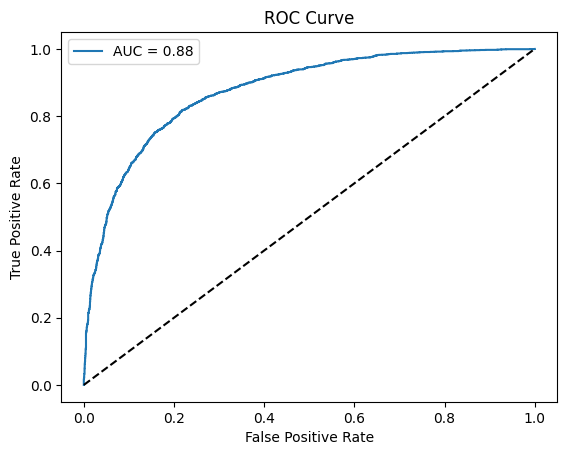

In [191]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

good upward arc in the curve, indicates higher rates of true positives and lower rates of false positives. The area under the curve being closer to 1 indicates that the model predictions are not random, but specific based on the data provided.

## **BONUS** (optional)



* Upload an image of your (or your friend's or family's) dog or cat and use your model to predict whether the image is a dog or cat.
* Hint: you'll probably need to convert the image from color to grayscale.  OpenCV, pillow, and other libraries are your friend.

Calling my image links from google drive here:
1. https://drive.google.com/file/d/1bfwSLKl6dGM7g3cCF1_V26yMUbHaqqhh/view?usp=sharing
1. https://drive.google.com/file/d/165NfjeMQyOIaX-GcyQqcRDxWV7Q_wN-Q/view?usp=sharing
1. https://drive.google.com/file/d/1qPCAfuMQPIcwgKFgR4nAzQCDGVXREx8z/view?usp=sharing
1. https://drive.google.com/file/d/1mvdIIM6dMAvXGHieQhRLi2M5ycJZ65UD/view?usp=sharing

In [192]:
# call drive mount
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [193]:
# extract image IDs from google drive URL
img1_id = '1bfwSLKl6dGM7g3cCF1_V26yMUbHaqqhh'
img2_id = '165NfjeMQyOIaX-GcyQqcRDxWV7Q_wN-Q'
img3_id = '1qPCAfuMQPIcwgKFgR4nAzQCDGVXREx8z'
img4_id = '1mvdIIM6dMAvXGHieQhRLi2M5ycJZ65UD'

# make download links
img1_url = f'https://drive.google.com/uc?export=download&id={img1_id}'
img2_url = f'https://drive.google.com/uc?export=download&id={img2_id}'
img3_url = f'https://drive.google.com/uc?export=download&id={img3_id}'
img4_url = f'https://drive.google.com/uc?export=download&id={img4_id}'

# make array of links
img_links = [img1_url, img2_url, img3_url, img4_url]
img_arr = np.array(img_links)
print(img_arr)

# make target array
img_targets = np.array([0,0,1,0])
img_targets

['https://drive.google.com/uc?export=download&id=1bfwSLKl6dGM7g3cCF1_V26yMUbHaqqhh'
 'https://drive.google.com/uc?export=download&id=165NfjeMQyOIaX-GcyQqcRDxWV7Q_wN-Q'
 'https://drive.google.com/uc?export=download&id=1qPCAfuMQPIcwgKFgR4nAzQCDGVXREx8z'
 'https://drive.google.com/uc?export=download&id=1mvdIIM6dMAvXGHieQhRLi2M5ycJZ65UD']


array([0, 0, 1, 0])

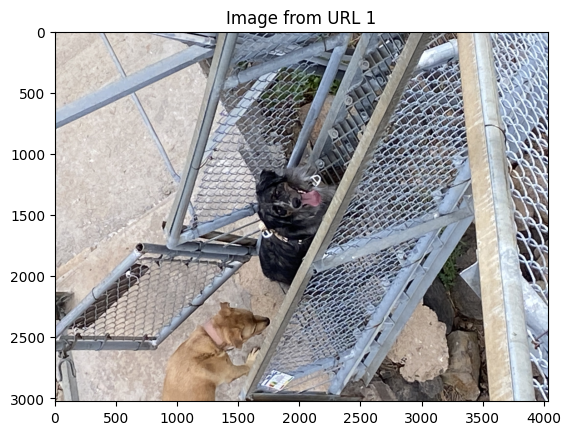

Target value for this image: 0


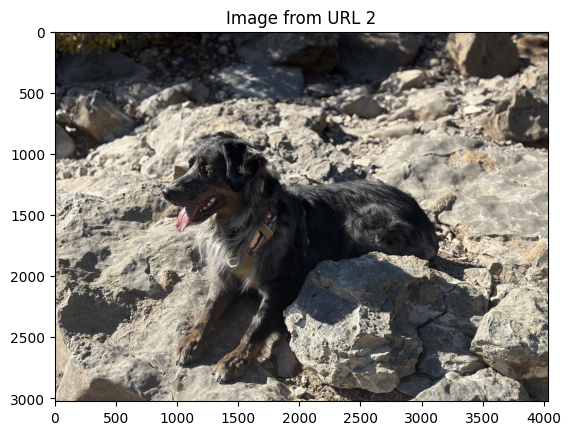

Target value for this image: 0


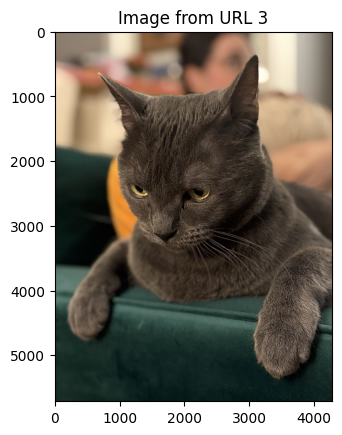

Target value for this image: 1


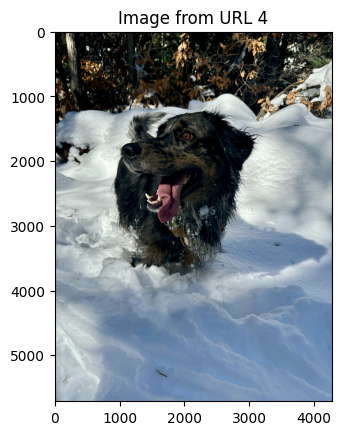

Target value for this image: 0


In [194]:
# show all images
for i, url in enumerate(img_links):
  response = requests.get(url)
  img = Image.open(BytesIO(response.content))

  # show the image
  plt.imshow(img)
  plt.title(f"Image from URL {i+1}")
  plt.show()

  # print the corresponding target value
  print(f"Target value for this image: {img_targets[i]}")

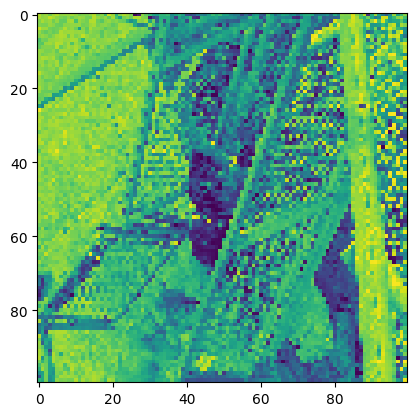

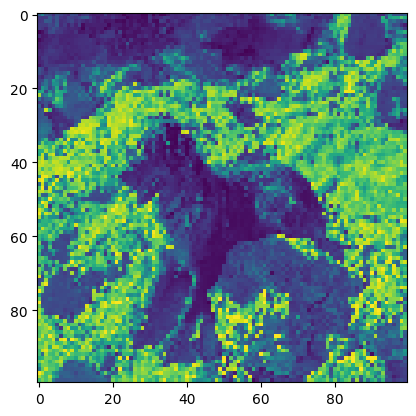

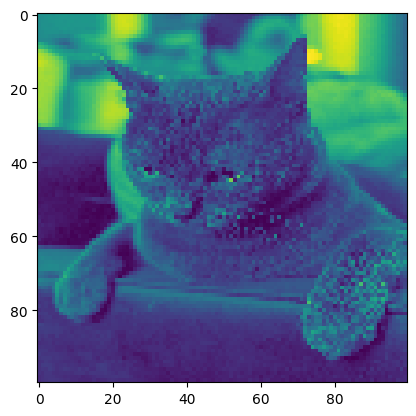

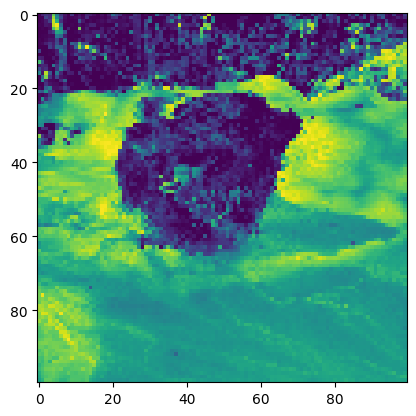

In [195]:
# process images with read_pic and display
img_arr = np.array([read_pic(url) for url in img_links])
for i in range(len(img_arr)):
  plt.imshow(np.squeeze(img_arr[i]))
  plt.show()

In [196]:
img_arr

array([[[[[226.13     ],
          [211.1593   ],
          [216.8706   ],
          ...,
          [145.1669   ],
          [173.33821  ],
          [209.1066   ]],

         [[222.1474   ],
          [213.1591   ],
          [216.15881  ],
          ...,
          [209.1066   ],
          [216.1768   ],
          [179.8645   ]],

         [[206.87161  ],
          [221.15831  ],
          [211.8711   ],
          ...,
          [156.03479  ],
          [187.098    ],
          [146.8077   ]],

         ...,

         [[128.6083   ],
          [145.6497   ],
          [202.2679   ],
          ...,
          [ 60.1574   ],
          [126.8177   ],
          [ 94.015    ]],

         [[ 68.679    ],
          [151.84482  ],
          [201.9089   ],
          ...,
          [ 45.7998   ],
          [107.168    ],
          [165.79681  ]],

         [[165.83261  ],
          [152.1437   ],
          [201.9798   ],
          ...,
          [143.7792   ],
          [109.793396 ],
          

In [198]:
# run images through model for predictions
for i in range(len(img_arr)):
  prediction = model.predict(img_arr[i])
  print(f' {prediction} is the predicted target value. (0 = dog, 1 = cat)')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
 [[1.]] is the predicted target value. (0 = dog, 1 = cat)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
 [[0.]] is the predicted target value. (0 = dog, 1 = cat)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
 [[1.]] is the predicted target value. (0 = dog, 1 = cat)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
 [[3.9249478e-27]] is the predicted target value. (0 = dog, 1 = cat)


cool, the model only missed the first one, probably because it's pretty zoomed out and sideways.